In [24]:
import warnings
warnings.simplefilter('ignore')

# StatsModels 패키지의 ARMA 모형 클래스

StatsModels 패키지는 ARMA 모형 분석 및 추정을 위해 다음과 같은 클래스를 제공한다.

| 클래스 이름   | 용도        |
| ------------- |-------------|
| `ArmaProcess` | 미리 정해진 계수를 가진 ARMA 모형 |
| `ARMA`        | 주어진 자료에서 계수를 추정하기 위한 ARMA 모형 |
| `ARMAResults` | 주어진 자료에서 추정된 ARMA 모형  |

## `ArmaProcess` 클래스 사용법

`ArmaProcess` 클래스는 정해진 모형 계수를 가진 ARMA 모형을 특성을 분석하기 위한 클래스이다.

### 모형 생성

| 클래스 이름   | 용도 |
| ------------- |------|
| `ArmaProcess` | AR, MA 계수 행렬에서 ARMA 모형 생성 |
| `ArmaProcess.from_estimation()` | 추정된 ARMAResults 에서 ARMA 모형 생성 |

계수로부터 ARMA 모형을 만드는 경우에는 `ArmaProcess`를 직접 사용한다. 계수의 부호는 다음 수식을 기준으로 한다.

$$  Y_t = -\phi_1 Y_{t-1} - \phi_2 Y_{t-2} \cdots - \phi_p Y_{t-p} + \mu + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \cdots \theta_q e_{t-q} $$

$$  \phi(L) Y_t = \mu + \theta(L) e_t  $$
  
$$
\begin{eqnarray}
  \phi(L) &= 1 + \phi_1 L + \phi_2 L^2 + \cdots \phi_p L^p \\
  \theta(L) &= 1 + \theta_1 L + \theta_2 L^2 + \cdots \theta_q L^q
\end{eqnarray}
$$

다음은 `ArmaProcess` 를 사용하는 예제이다. 여기에서는 다음과 같은 ARMA(2,2) 모형을 생성한다.

$$   Y_t = 0.75 Y_{t-1} - 0.25 Y_{t-2} + e_t + 0.65 e_{t-1} + 0.35 e_{t-2}  $$


In [1]:
ar = np.r_[1, -0.75, 0.25] 
ma = np.r_[1, 0.65, 0.35]
m = sm.tsa.ArmaProcess(ar, ma)

### 샘플 시계열 생성

| 메서드, 속성 이름 | 용도 |
|--|--|
| `generate_sample()` | 주어진 ARMA 모형에서 나올 수 있는 시계열을 무작위로 생성 |

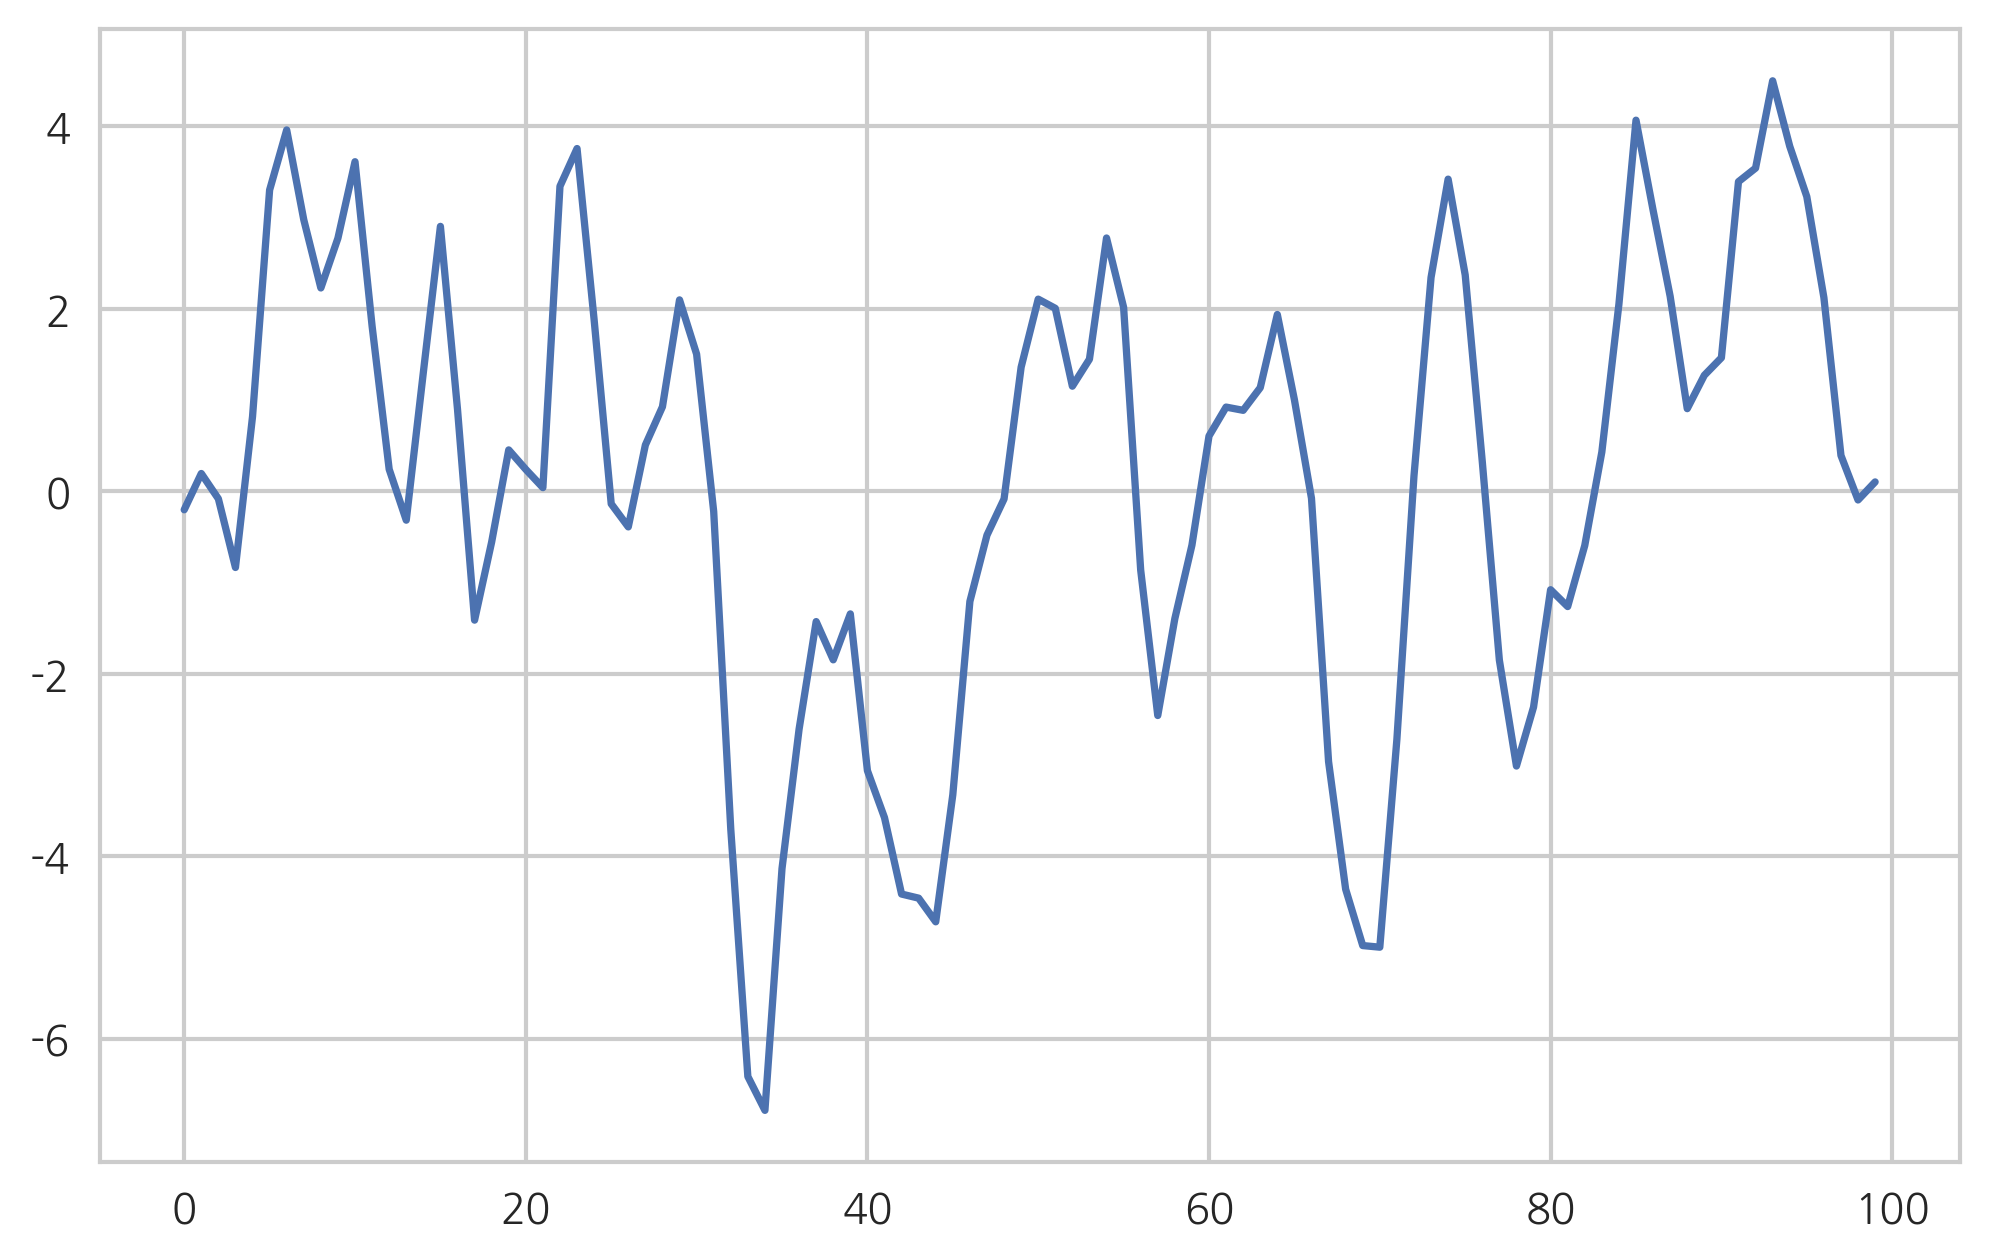

In [2]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

### 특성 분석

| 메서드, 속성 이름 | 	용도 |
|--|--|
| `isstationary` |  	모형 안정성(stability) |
| `isinvertible` | 	모형 가역성(invertibility) |
| `acovf()` | 	이론적인 자기 공분산(autocovariance) 값 |
| `acf()` | 	이론적인 자기 상관계수(autocorrelation) 값 |
| `pacf()` | 	이론적인 자기 편상관계수(partial autocorrelation) 값 |

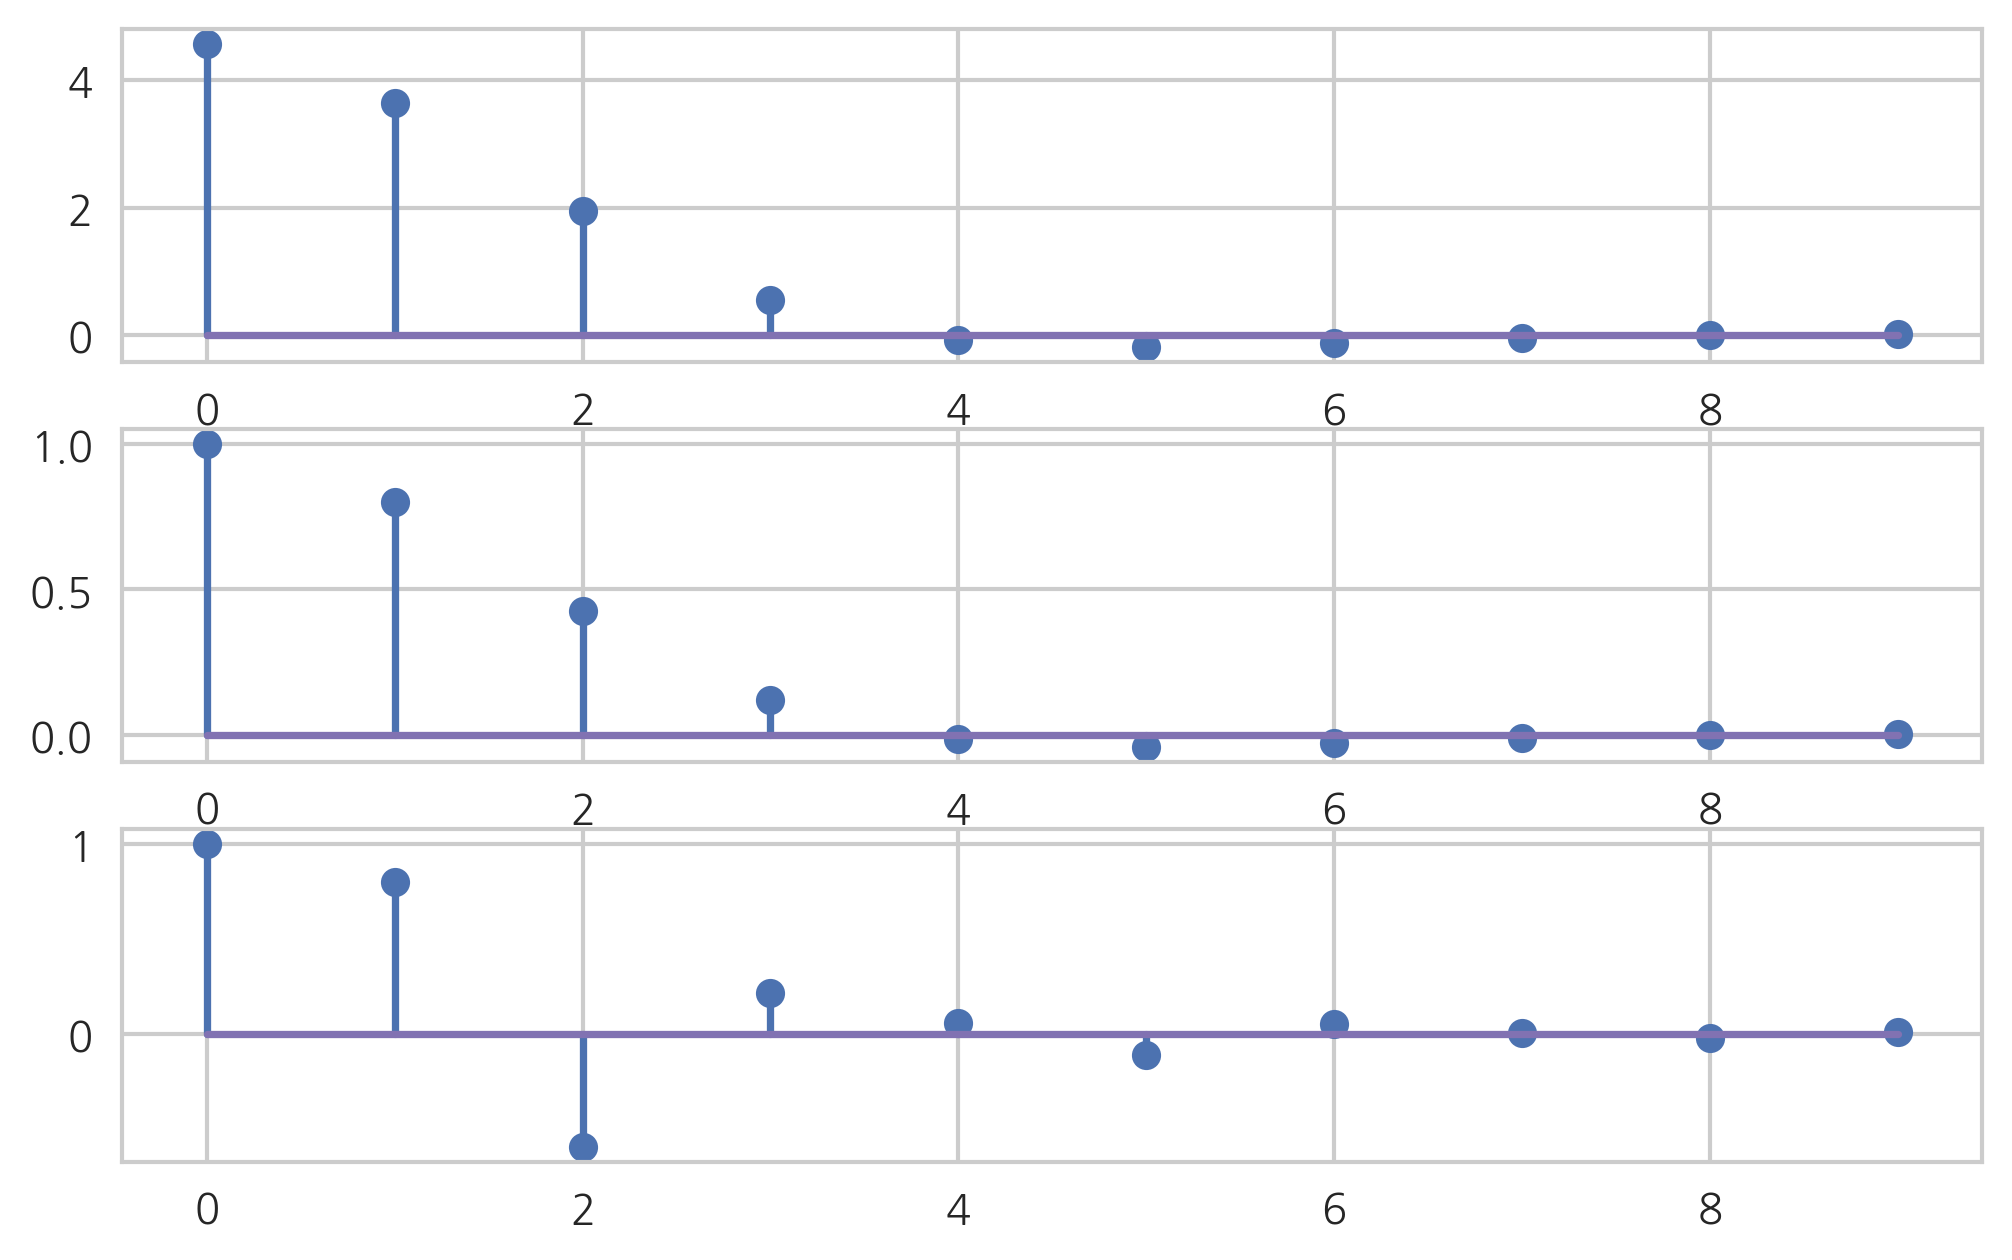

In [3]:
plt.subplot(311)
plt.stem(m.acovf(10))
plt.subplot(312)
plt.stem(m.acf(10))
plt.subplot(313)
plt.stem(m.pacf(10))
plt.show()

## `ARMA` 및 `ARMAResults` 클래스 사용법

`ARMA` 및 `ARMAResults` 클래스는 미리 계수가 정해진 이론적 모형이 아니라 주어진 자료로부터 모형을 추정할 때 사용하는 클래스이다. 사용 방법은 다음과 같다.


1. 우선 주어진 자료와 차수를 입력변수로 `ARMA` 객체를 생성하고
2. `ARMA.fit()` 메서드를 사용하여 추정결과를 `ARMAResults` 클래스 객체로 출력한다.


In [5]:
m2 = sm.tsa.ARMA(x, (2, 2))
r = m2.fit(disp=False)
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                -144.231
Method:                       css-mle   S.D. of innovations              1.011
Date:                Tue, 14 Aug 2018   AIC                            300.462
Time:                        19:11:16   BIC                            316.093
Sample:                             0   HQIC                           306.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.533      0.216      0.829      -0.929       1.159
ar.L1.y        0.6593      0.171      3.864      0.000       0.325       0.994
ar.L2.y       -0.0966      0.159     -0.606      0.5

`ARMA` 클래스 객체는 모델과 자료에 관한 정보를 다음과 같은 속성값에 나누어 저장한다.

| 속성 이름 | 	용도 | 
|--|--|
|`endog` |  	원자료 |
|`endog_names` |  	원자료 변수명 |

`ARMAResults` 클래스 객체는 추정 결과 정보를 다음과 같은 속성값에 나누어 저장한다.

|속성/메서드 이름 |	용도 |
|-|-|
|`model`|  	추정 자료와 모형 차수 등을 가진 ARMA 클래스 객체 |
|`k_ar`|  	AR 차수 |
|`k_ma`|  	MA 차수 |
|`arparams`|  	추정된 AR 계수 |
|`maparams`|  	추정된 MA 계수 |
|`params`|  	추정된 전체 계수 (trend 계수 포함) |
|`bse`|  	추정된 전체 계수의 표준 오차 |
|`tvalues`|  	추정된 계수의 t statistics | 
|`pvalues`|  	추정된 계수의 t statistics에 대한 p value |
|`conf_int()`|  	추정된 계수의 신뢰구간 계산 |
|`llf`|  	Log Likelihood 값 |
|`aic`|  	AIC 값 |
|`bic`|  	BIC 값 |
|`hqic`|  	HQIC 값 |
|`fittedvalues`|  	추정 모형에 의한 예측값 |
|`resid`|  	추정 모형에 의한 잔차항(Residuals) |
|`sigma2`|  	추정 모형에 의한 잔차항의 분산 |

In [6]:
r.arparams

array([ 0.65927042, -0.09655686])

In [7]:
r.maparams

array([0.84051327, 0.50663556])

In [8]:
r.params

array([ 0.1151924 ,  0.65927042, -0.09655686,  0.84051327,  0.50663556])

In [9]:
r.bse

array([0.53261667, 0.17061559, 0.15928805, 0.14462623, 0.10919882])

In [10]:
r.tvalues

array([ 0.21627638,  3.86406909, -0.6061777 ,  5.81162393,  4.63957008])

In [11]:
r.pvalues

array([8.29236047e-01, 2.03787084e-04, 5.45842488e-01, 8.23426780e-08,
       1.11581329e-05])

In [12]:
r.conf_int()

array([[-0.92871708,  1.15910189],
       [ 0.32487001,  0.99367083],
       [-0.4087557 ,  0.21564198],
       [ 0.55705106,  1.12397548],
       [ 0.29260981,  0.72066131]])

In [13]:
r.llf

-144.23101337028396

In [14]:
r.aic

300.4620267405679

In [15]:
r.bic

316.09304785649647

In [16]:
r.hqic

306.7881822502627

In [17]:
r.sigma2

1.0211629255952785

In [18]:
r.fittedvalues

array([ 0.1151924 , -0.1550703 ,  0.40740443, -0.32549486, -1.12728971,
        2.01300414,  4.15862953,  2.80999888,  1.66196723,  1.78482023,
        2.77478571,  3.36083719,  0.01130105, -0.56146008,  0.13649935,
        2.03773303,  3.15051006, -1.09364656, -2.37881993,  1.18675744,
        0.70544446, -0.60327554,  0.35389393,  5.08199182,  2.59672286,
       -0.35486098, -0.4072268 , -0.073353  ,  0.91412438,  0.91161414,
        2.34109647,  0.72959891, -1.46840038, -4.72965902, -6.36754378,
       -5.00642201, -1.50003784, -1.76064039, -0.92362575, -1.64024802,
       -0.87929327, -3.5241609 , -3.16252245, -3.59388938, -3.82548871,
       -3.81937199, -1.72632023,  0.25874544, -0.51260495,  0.02249644,
        2.29116773,  1.82323756,  1.22221362,  0.64354573,  1.52794672,
        3.19042333,  0.75097728, -2.66935666, -2.12888138,  0.08842864,
       -0.40768762,  1.00974191,  1.03555457,  0.3725459 ,  1.27416884,
        2.15642864, -0.11340569, -0.65532926, -3.81881134, -4.16

In [19]:
r.resid

array([-0.31990006,  0.34742291, -0.49173628, -0.51157748,  1.94332074,
        1.28494481, -0.20253071,  0.16241631,  0.56299478,  0.98570804,
        0.83339982, -1.55262598,  0.22777516,  0.24269449,  1.16261468,
        0.86223868, -2.25224713, -0.32030569,  1.82054462, -0.73582404,
       -0.46832849,  0.64103283,  2.98521972, -1.32956513, -0.72093608,
        0.21517929,  0.01483068,  0.57788966,  0.00968401,  1.18284919,
       -0.84093959, -0.95272078, -2.23420209, -1.68382747, -0.41675346,
        0.87095741, -1.10859144,  0.33105514, -0.92510776,  0.29463332,
       -2.18300878, -0.05281819, -1.25213139, -0.86572926, -0.89326885,
        0.492231  ,  0.51730474, -0.74169626,  0.42619955,  1.33465481,
       -0.18854383,  0.17894628, -0.0732983 ,  0.80103228,  1.24442855,
       -1.17718738, -1.61625247,  0.21061515,  0.73173993, -0.68142303,
        1.01089356, -0.08962722, -0.15087839,  0.76014307,  0.66028729,
       -1.15562491,  0.03412414, -2.30839147, -0.54260235, -0.81

또한 `ARMAResults` 클래스 객체는 다음과 같은 유용한 메서드도 제공한다.

| 메서드 이름 	| 용도 |
|--|--|
|`summary()`| 	추정 결과 요약 문자열 |
|`summary2()`| 	추정 결과 요약 문자열 |
|`forecast()`| 	예측 (자료가 끝난 다음의 미래 예측, 신뢰구간 출력) |
|`predict()`| 	예측 (자료 내부의 in-sample 예측도 가능) |
|`plot_predict()`| 	예측 플롯. forecast() 결과를 시각화 |

In [20]:
r.forecast(20)[0]

array([0.56132692, 0.48980492, 0.31908601, 0.21344202, 0.16027814,
       0.13542942, 0.12418074, 0.11916412, 0.11694296, 0.11596299,
       0.1155314 , 0.11534149, 0.11525796, 0.11522123, 0.11520508,
       0.11519798, 0.11519485, 0.11519348, 0.11519288, 0.11519261])

In [21]:
r.predict(100, 120)

array([0.56132692, 0.48980492, 0.31908601, 0.21344202, 0.16027814,
       0.13542942, 0.12418074, 0.11916412, 0.11694296, 0.11596299,
       0.1155314 , 0.11534149, 0.11525796, 0.11522123, 0.11520508,
       0.11519798, 0.11519485, 0.11519348, 0.11519288, 0.11519261,
       0.1151925 ])

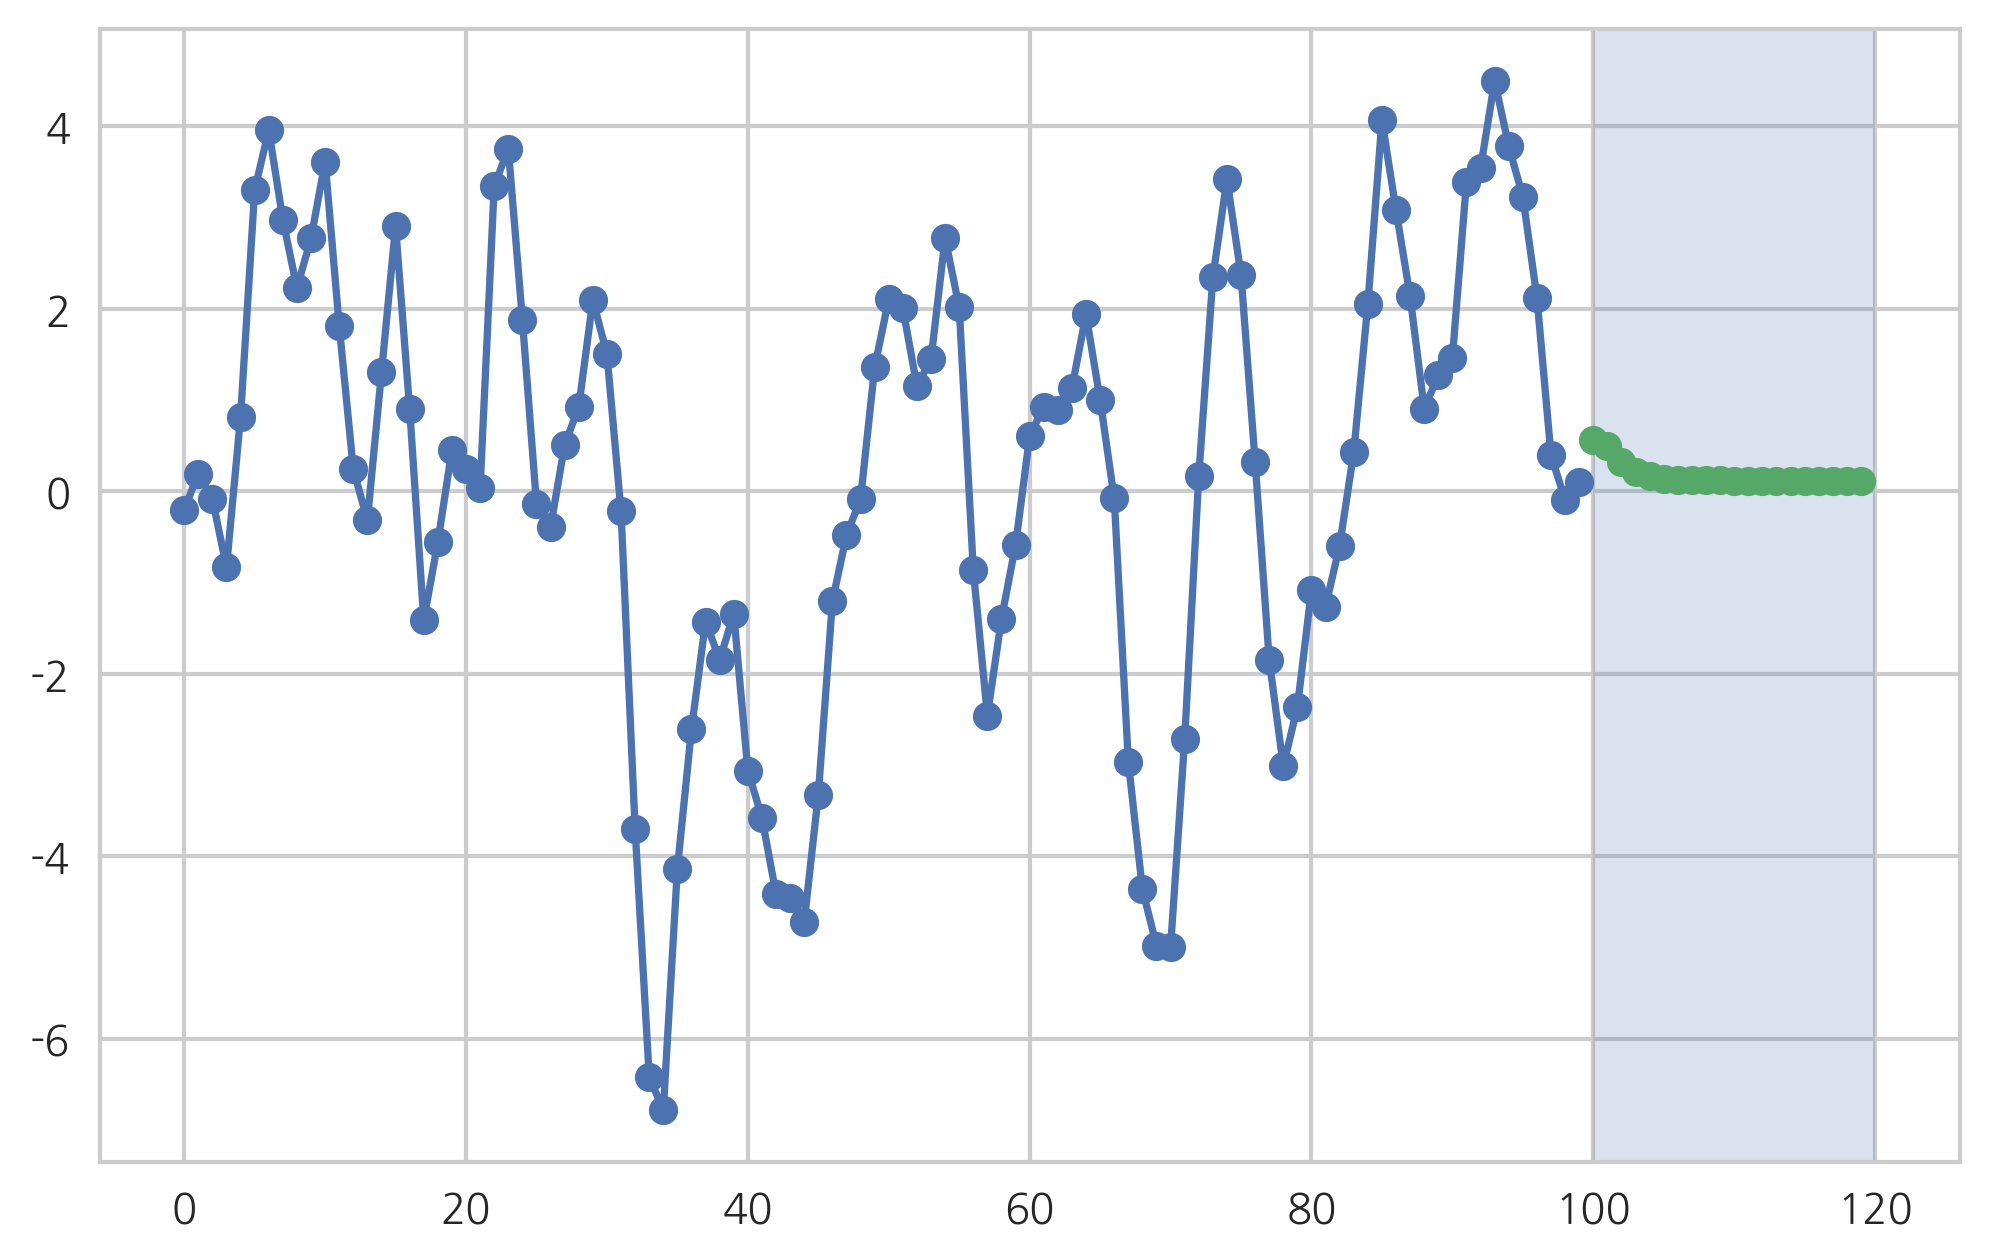

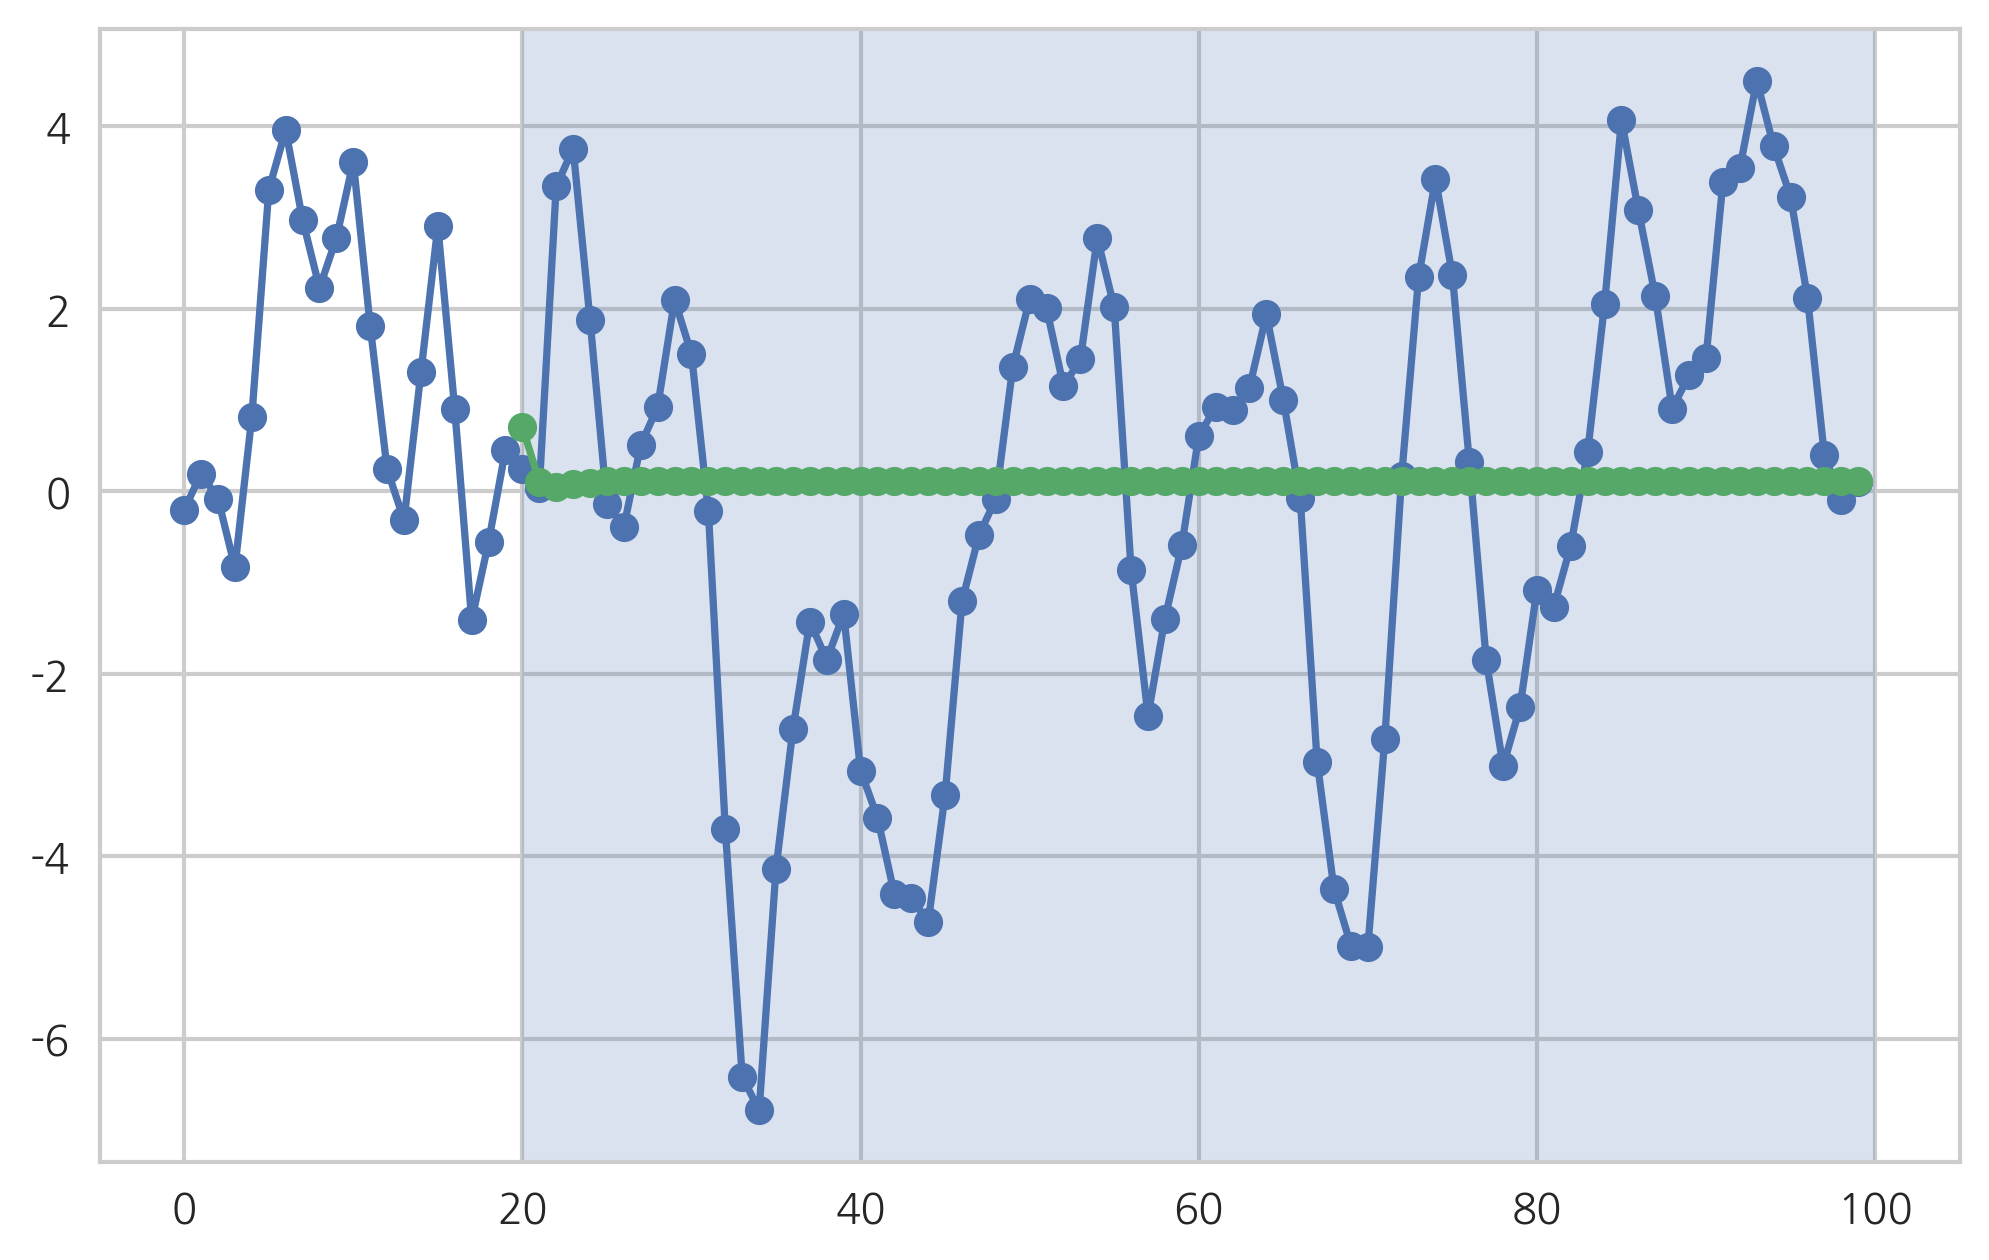

In [25]:
plt.figure(1)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 100, r.forecast(20)[0]], marker='o'); plt.axvspan(xmin=100, xmax=120, alpha=0.2)
plt.figure(2)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 20, r.predict(20, dynamic=True)], marker='o'); plt.axvspan(xmin=20, xmax=100, alpha=0.2)
plt.show()